In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the dataset from the database:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM useducation', con=engine)

# Dispose open connection, as we're only doing a single query:
engine.dispose()

# Print out the first 5 rows of the dataset:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
# Make a copy of df:
df1 = df.copy()

# Fill in missing values using interpolation method and mean values
states = df1['STATE'].unique()
for state in states:
        df1[df1['STATE'] == state] = df1[df1['STATE'] == state].interpolate(limit_direction='both')
        
# Fill the rest of  missing values using mean values by year:
years = df1['YEAR'].unique()
for year in years:
        df1[df1['YEAR'] == year] = df1[df1['YEAR'] == year].fillna(df1[df1['YEAR'] == year].mean())
        
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

### 1 - Derive the descriptive statistics of the data 

In [4]:
# Get univariate statistics from the dataset:
df1.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.132972e+05,9.222407e+06,7.760076e+05,4.278879e+06,4.167520e+06,9.320777e+06,4.831368e+06,...,64101.797229,63768.585731,54293.776674,5.152761e+05,2.459446e+05,7.978096e+05,232.620129,277.250010,218.414638,263.042031
std,NaN,NaN,7.393983,1.003946e+06,1.136814e+07,1.097152e+06,5.371528e+06,5.310535e+06,1.156018e+07,6.091464e+06,...,80360.900460,78898.821059,68661.704029,6.430910e+05,3.087256e+05,9.671877e+05,10.234342,9.756652,7.383841,5.777451
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.854930e+05,2.494691e+06,2.113685e+05,1.328511e+06,8.765120e+05,2.470963e+06,1.313649e+06,...,13311.000000,12989.250000,10741.000000,1.071090e+05,4.992725e+04,1.751172e+05,225.838559,271.804358,214.874596,260.016238
50%,NaN,NaN,2004.000000,7.346520e+05,5.827506e+06,4.543020e+05,2.876344e+06,2.419976e+06,5.941505e+06,3.045600e+06,...,42821.000000,43022.500000,36470.000000,3.426575e+05,1.623915e+05,5.636270e+05,234.243214,278.708273,219.650601,263.543956
75%,NaN,NaN,2011.000000,9.590905e+05,1.131492e+07,8.994268e+05,5.220582e+06,4.995971e+06,1.121297e+07,5.724599e+06,...,75300.000000,76080.500000,67622.750000,6.091405e+05,2.908644e+05,9.126062e+05,240.477019,283.834861,223.311034,267.045637


### 2 - Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [5]:
# Extract data to only include California:
cali_df = df1[df1['STATE']=='CALIFORNIA']
cali_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,5129788.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,269.197451
56,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,208.581491,261.362305,198.051458,269.197451
108,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,3372294.0,1421547.0,4860291.0,208.764022,261.832363,199.338502,269.197451
161,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,3430751.0,1464841.0,4964774.0,208.946552,262.302421,200.625547,269.197451
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
264,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,...,451069.0,412604.0,317595.0,3591033.0,1578929.0,5246546.0,210.238093,262.622115,202.913590,268.021605
316,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5375481.0,211.347104,262.471753,203.914589,266.845758
367,1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,...,489356.0,431730.0,347914.0,3734997.0,1675778.0,5496767.0,212.456114,262.321390,204.915588,265.669912
420,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,5602511.0,213.565125,262.171027,205.916588,264.494066
472,2001_CALIFORNIA,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,...,485301.0,461133.0,365907.0,3871843.0,1745295.0,5717489.0,218.195077,263.797185,205.821871,261.353837


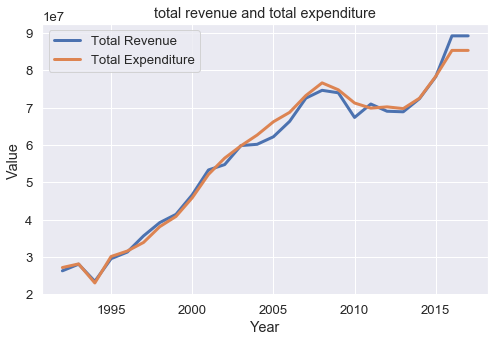

In [6]:
# Plot 'TOTAL_REVENUE' and 'TOTAL_EXPENDITURE' variables:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

sns.lineplot(x='YEAR', y='TOTAL_REVENUE', data=cali_df, linewidth=3, label='Total Revenue')
sns.lineplot(x='YEAR', y='TOTAL_EXPENDITURE', data=cali_df, linewidth=3, label='Total Expenditure')
plt.ylabel('Value')
plt.xlabel('Year')
plt.title("total revenue and total expenditure")
plt.legend()

Looking at the plot above describing the total revenues vs total expenditures in California, it's clear that they both increased remarkably over time and they positively correlate (moved at the same direction over time).
Both total revenues and total expenditures peaked during 2006-2008 and droped remarkably during 2009-2013 before picking up again. This is because during 2009-2013, the U.S. went through a recession and housing buble that crashed the economy. As the result of the recession, it makes sense that both revenues and spendings on education dropped.

### 3 - In your chosen state, which one of the lessons the students are more successful, math or reading?

In [7]:
# Explore average math and reading scores data:
cali_df[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,26.000000,26.000000,26.000000,26.000000
mean,223.265888,206.932370,268.087255,263.171501
std,10.328831,5.034984,5.482377,4.559371
min,208.398961,196.764414,260.892247,254.895247
25%,211.624357,204.164839,262.509343,259.833780
50%,229.472530,206.292129,268.180972,262.023984
75%,231.848339,211.159107,272.479651,267.727643
max,234.164993,215.421814,276.638200,269.197451


Just by looking at the descriptive statistics above, we can see that on average, students in California are more successful at math rather than reading. Let's visualize the data to confirm this.

Text(0, 0.5, 'Average Score')

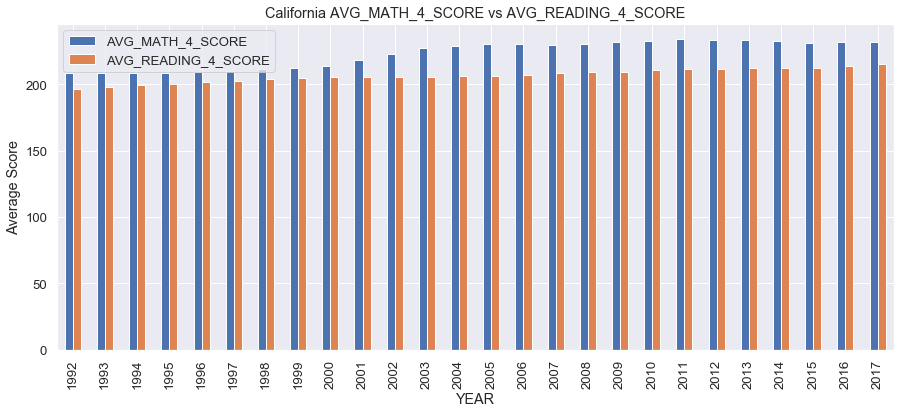

In [13]:
# Plotting avg_math_4_score in California over time:
cali_df.plot(x='YEAR', y=['AVG_MATH_4_SCORE','AVG_READING_4_SCORE'], kind='bar', figsize=(15,6))
plt.title('California AVG_MATH_4_SCORE vs AVG_READING_4_SCORE')
plt.ylabel('Average Score') 

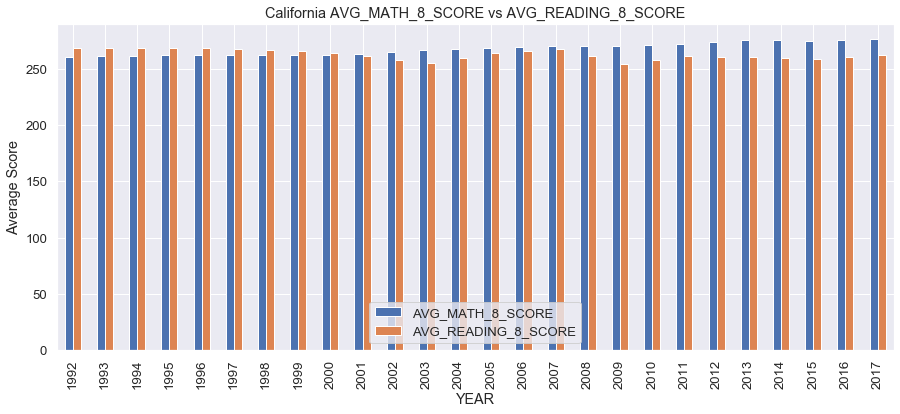

In [14]:
# Plotting avg_math_8_score in California over time:
cali_df.plot(x='YEAR', y=['AVG_MATH_8_SCORE','AVG_READING_8_SCORE'], kind='bar', figsize=(15,6))
plt.title('California AVG_MATH_8_SCORE vs AVG_READING_8_SCORE')
plt.ylabel('Average Score') 
plt.legend(loc='lower center')

As seen from both plots above, we can confirm that students in California have higher average math scores than average reading scores.

### 4 - What are the distributions of the math and reading scores in the sample?

Text(0.5, 1.0, 'AVG_READING_8_SCORE histogram')

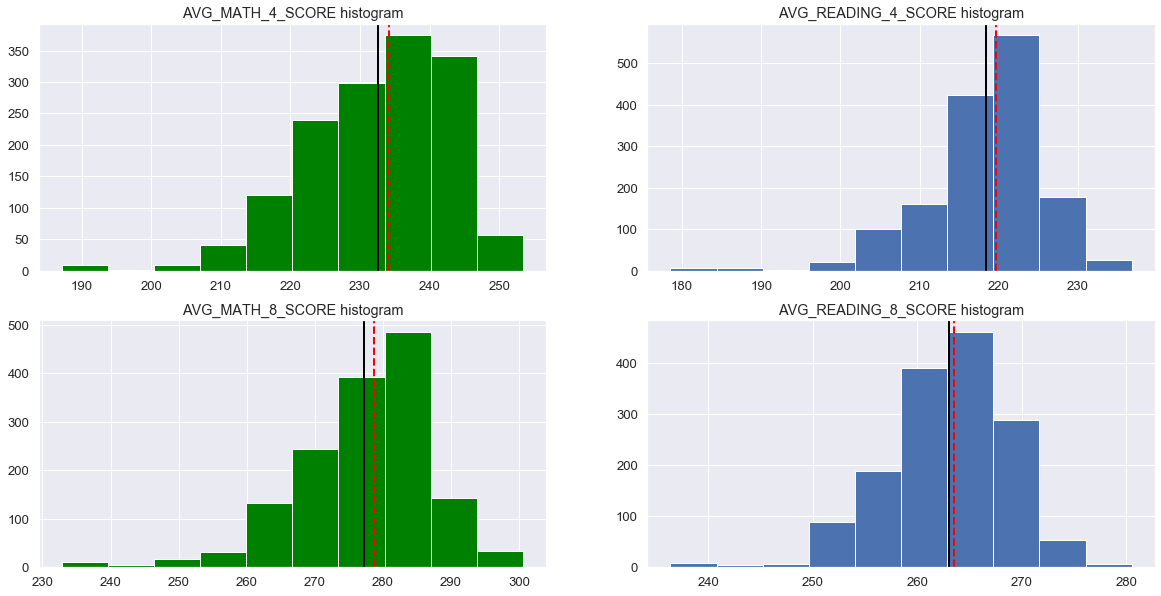

In [15]:
# Plot the distribution of math and reading scores in the sample:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df1['AVG_MATH_4_SCORE'], color='green')
plt.axvline(df1['AVG_MATH_4_SCORE'].mean(), linestyle='-', c='black', linewidth=2)
plt.axvline(df1['AVG_MATH_4_SCORE'].median(), c='red', linestyle='--', linewidth=2)
plt.title('AVG_MATH_4_SCORE histogram')

plt.subplot(2,2,2)
plt.hist(df1['AVG_READING_4_SCORE'])
plt.axvline(df1['AVG_READING_4_SCORE'].mean(), linestyle='-', c='black', linewidth=2)
plt.axvline(df1['AVG_READING_4_SCORE'].median(), c='red', linestyle='--', linewidth=2)
plt.title('AVG_READING_4_SCORE histogram')

plt.subplot(2,2,3)
plt.hist(df1['AVG_MATH_8_SCORE'], color='green')
plt.axvline(df1['AVG_MATH_8_SCORE'].mean(), linestyle='-', c='black', linewidth=2)
plt.axvline(df1['AVG_MATH_8_SCORE'].median(), c='red', linestyle='--', linewidth=2)
plt.title('AVG_MATH_8_SCORE histogram')

plt.subplot(2,2,4)
plt.hist(df1['AVG_READING_8_SCORE'])
plt.axvline(df1['AVG_READING_8_SCORE'].mean(), linestyle='-', c='black', linewidth=2)
plt.axvline(df1['AVG_READING_8_SCORE'].median(), c='red', linestyle='--', linewidth=2)
plt.title('AVG_READING_8_SCORE histogram')

The black line shows the average score and the red dashed line represents the median score for each category. Looking at the histograms above, we notice that all plots are right-skewed with the median values greater than the mean values

### 5 - Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [11]:
# Explore misisng values for each score column:
df[['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 4 columns):
AVG_MATH_4_SCORE       536 non-null float64
AVG_READING_4_SCORE    533 non-null float64
AVG_MATH_8_SCORE       532 non-null float64
AVG_READING_8_SCORE    498 non-null float64
dtypes: float64(4)
memory usage: 46.8 KB


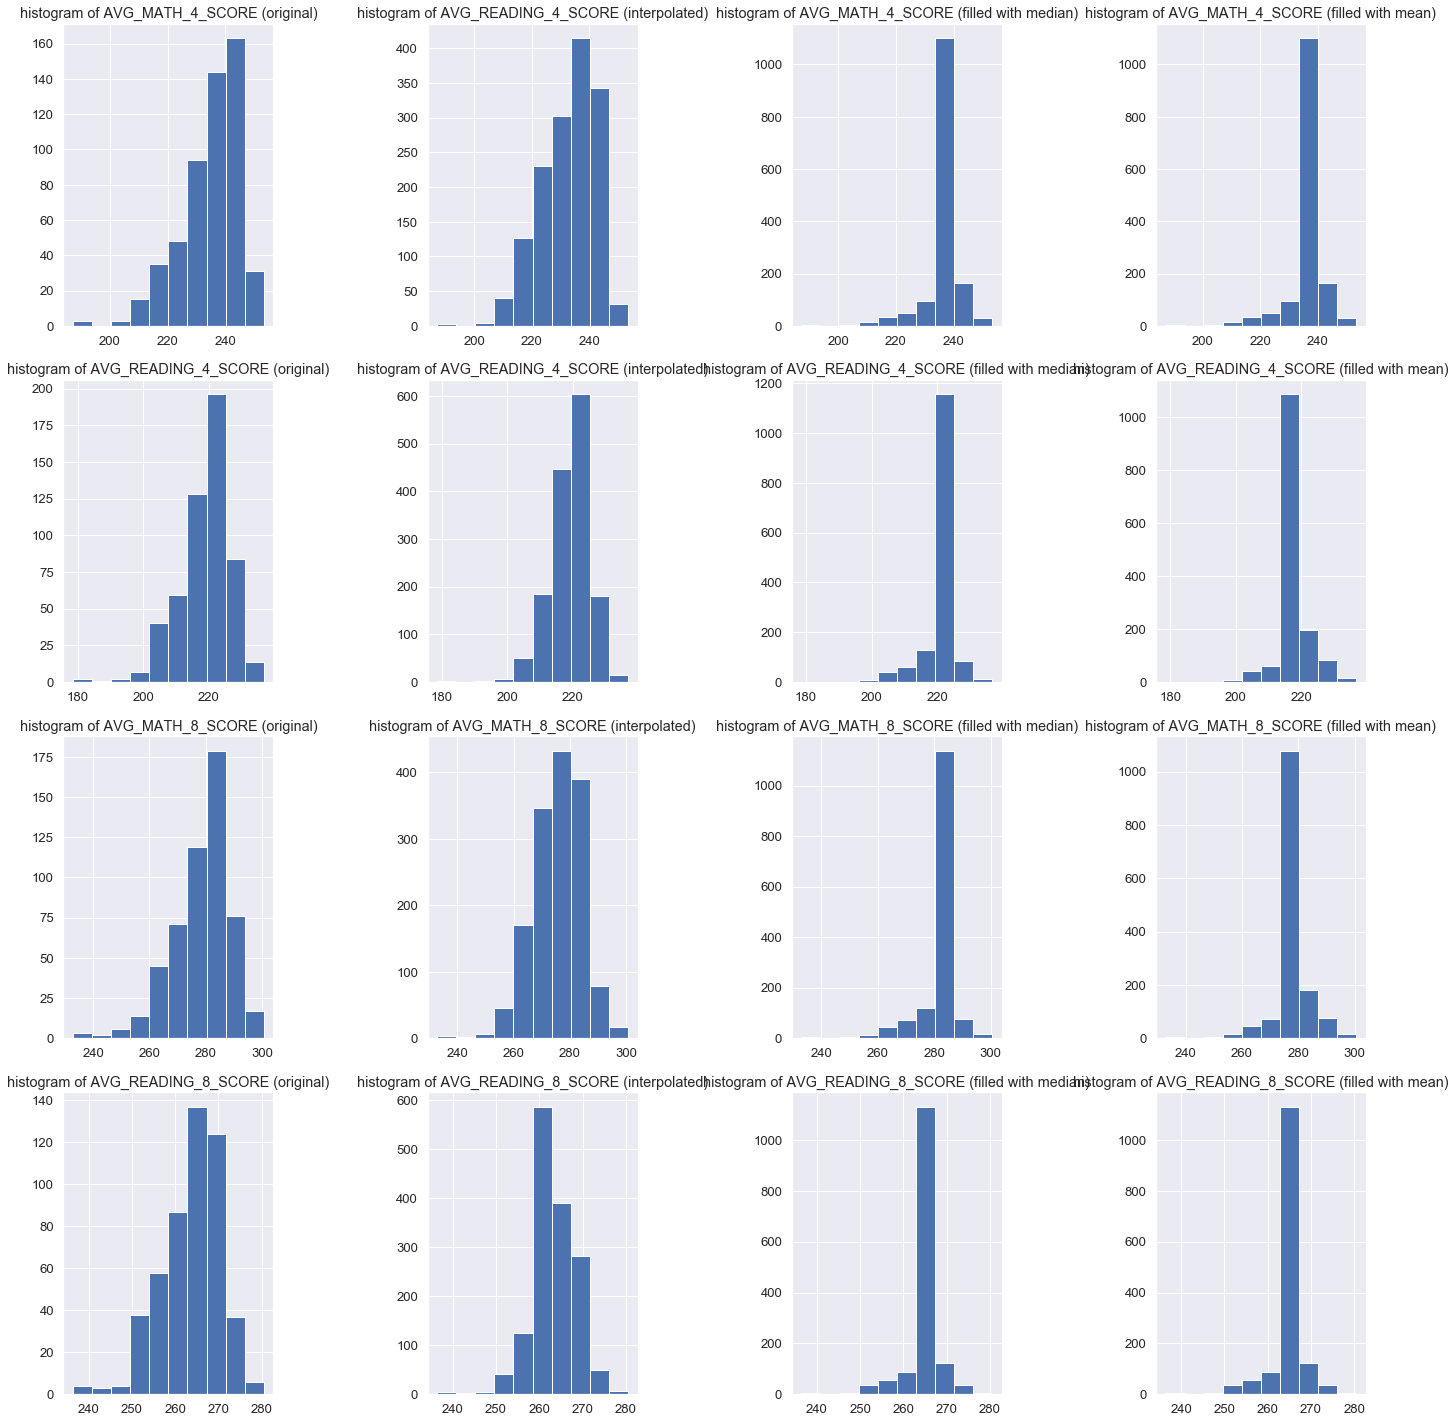

In [16]:
# Plotting the score distributions for different fillna methods:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()